In [18]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc
import warnings
from copy import deepcopy

# visualisation
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# settings
warnings.simplefilter('ignore')
title_font_config=dict(
        family = 'Balto',
        size = 22,
        color = '#6f199c'
    )

In [19]:
import os

filepaths = {}
#directory_path = 'D:\\Project\\Terrorist attacks'  # Specify your directory path here

for dirname, _, filenames in os.walk('D:\\Project\\Terrorist attacks\\Terrorist data'):
    for i, filename in enumerate(filenames):
        filepaths[i] = os.path.join(dirname, filename)
        # Print the index and the corresponding file path
        print(f"{i} - {os.path.join(dirname, filename)}")


0 - D:\Project\Terrorist attacks\Terrorist data\airliner-hijackings-and-fatalities-from-them.csv
1 - D:\Project\Terrorist attacks\Terrorist data\deaths-from-suicide-and-non-suicide-terrorist-attacks.csv
2 - D:\Project\Terrorist attacks\Terrorist data\deaths-from-terrorism-by-target.csv
3 - D:\Project\Terrorist attacks\Terrorist data\deaths-from-terrorist-attacks-by-method-of-attack-stacked-bar.csv
4 - D:\Project\Terrorist attacks\Terrorist data\deaths-from-terrorist-attacks-by-method.csv
5 - D:\Project\Terrorist attacks\Terrorist data\distribution-of-terrorism-deaths.csv
6 - D:\Project\Terrorist attacks\Terrorist data\distribution-of-terrorist-attacks.csv
7 - D:\Project\Terrorist attacks\Terrorist data\fatal-airliner-accidents-hijacking-incidents.csv
8 - D:\Project\Terrorist attacks\Terrorist data\global-fatalities-from-aviation-accidents-and-hijackings.csv
9 - D:\Project\Terrorist attacks\Terrorist data\injuries-from-terrorist-attacks.csv
10 - D:\Project\Terrorist attacks\Terrorist da

In [20]:
# params
my_country = 'India'

# custom function to format columns
def format_cols(col_list=None):
    formated_cols = []
    if col_list:
        for c in col_list:
            formated_cols.append('_'.join(c.lower().split(' ')))
        return formated_cols
    else:
        raise AttributeError('please provide a list') 
            
# color palette
palette = {1: '#1b1f3a',
           2: '#53354a',
           3: '#a64942',
           4: '#ff7844'
          }
palette

{1: '#1b1f3a', 2: '#53354a', 3: '#a64942', 4: '#ff7844'}

In [5]:
#Deaths from Suicidal v/s Non Suicidal Attacks

In [23]:
# load data deaths-from-suicide-and-non-suicide-terrorist-attacks.csv
csv = filepaths[1]
df = pd.read_csv(csv)
df

,Entity,Code,Year,Terrorism deaths Suicide,Terrorism deaths No Suicide
0,Afghanistan,AFG,1970,0,0
1,Afghanistan,AFG,1971,0,0
2,Afghanistan,AFG,1972,0,0
3,Afghanistan,AFG,1973,0,0
4,Afghanistan,AFG,1974,0,0
...,...,...,...,...,...
10512,Zimbabwe,ZWE,2017,0,0
10513,Zimbabwe,ZWE,2018,0,2
10514,Zimbabwe,ZWE,2019,0,0
10515,Zimbabwe,ZWE,2020,0,1


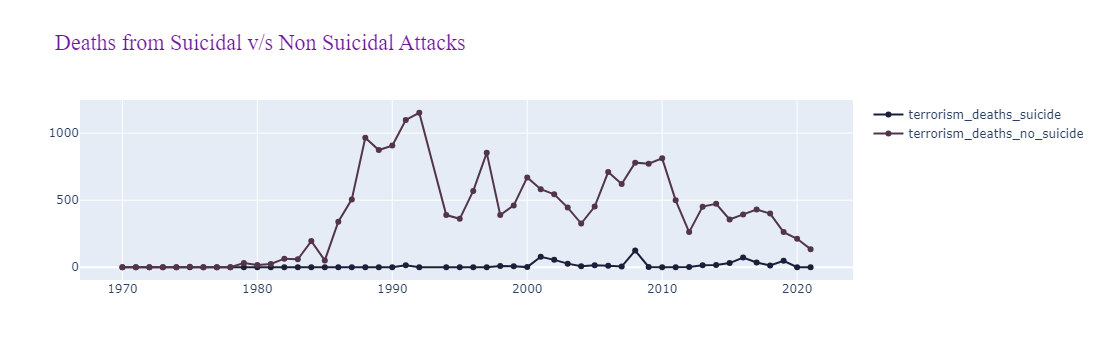

In [24]:
# format columns
df.columns = format_cols(df.columns.to_list())

# filter & reset index
df = df[df['entity'] == my_country]
df.reset_index(drop=True, inplace=True)

# visualize
fig = go.Figure()

# list of columns to plot
cols = df.columns[-2:].to_list()

# attacks, fatalies & injuries
for i, c in enumerate(cols,start=1):
    fig.add_trace(go.Scatter(x=df['year'], y=df[c],
                    mode='lines+markers',
                    name=c,
                    hovertemplate="<br>".join(["year: %{x}",
                                               "count: %{y}",
                                               "<extra></extra>"
                                              ]),
                    line=dict(color=palette[i], width=2) ))



fig.update_layout(title='Deaths from Suicidal v/s Non Suicidal Attacks',
                  title_font=title_font_config,
                  hovermode='x unified'
                 )
fig.show()

In [25]:
#2000 - 2020: A two decades observations

#Deaths from non suicidal attacks have sharply risen from 2000 with highest in 2016
#Deaths from suicidal attacks have been consistently below 10

In [ ]:
#Attacks Severity

In [42]:
# load data terrorism-attacks-by-severity.csv

csv = filepaths[15]
df = pd.read_csv(csv)
df

,Entity,Code,Year,Terrorist attacks (100+ deaths),Terrorist attacks (51-99 deaths),Terrorist attacks (21-50 deaths),Terrorist attacks (11-20 deaths),Terrorist attacks (6-10 deaths),Terrorist attacks (1-5 deaths),Terrorist attacks (0 deaths)
0,Afghanistan,AFG,1970,0,0,0,0,0,0,0
1,Afghanistan,AFG,1971,0,0,0,0,0,0,0
2,Afghanistan,AFG,1972,0,0,0,0,0,0,0
3,Afghanistan,AFG,1973,0,0,0,0,0,0,1
4,Afghanistan,AFG,1974,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10512,Zimbabwe,ZWE,2017,0,0,0,0,0,0,3
10513,Zimbabwe,ZWE,2018,0,0,0,0,0,1,1
10514,Zimbabwe,ZWE,2019,0,0,0,0,0,0,2
10515,Zimbabwe,ZWE,2020,0,0,0,0,0,1,0


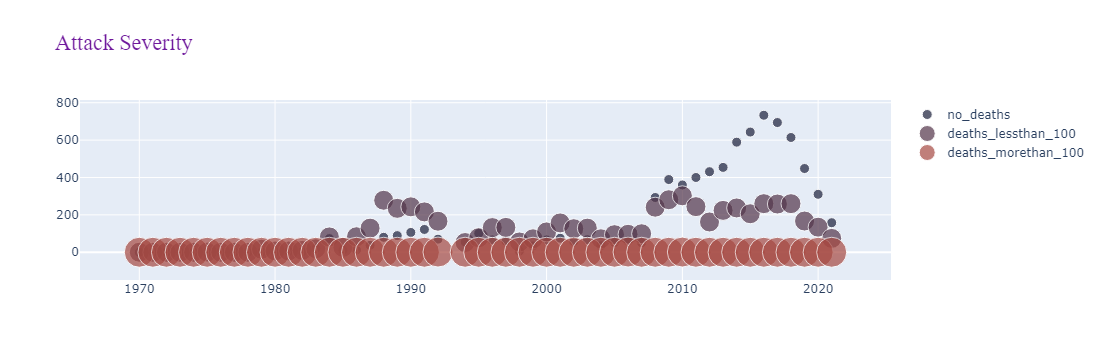

In [43]:
# format columns
df.columns = format_cols(df.columns.to_list())

# filter & reset index
df = df[df['entity'] == my_country]
df.reset_index(drop=True, inplace=True)

# new dataframe
lessthan_collist = zip(
                    df['terrorist_attacks_(51-99_deaths)'].to_list(),
                    df['terrorist_attacks_(21-50_deaths)'].to_list(),
                    df['terrorist_attacks_(11-20_deaths)'].to_list(),
                    df['terrorist_attacks_(6-10_deaths)'].to_list(),
                    df['terrorist_attacks_(1-5_deaths)'].to_list()
                   )

mapper = {'year': df.year.tolist(),
          'no_deaths': df['terrorist_attacks_(0_deaths)'].to_list(),
          'deaths_lessthan_100': [sum(item) for item in lessthan_collist],
          'deaths_morethan_100': df['terrorist_attacks_(100+_deaths)'].to_list()
        }
df_new = pd.DataFrame(mapper)


# list of columns to plot
cols = df_new.columns[-3:].to_list()

# attack severity
fig1 = go.Figure()

for i, c in enumerate(cols,start=1):
    fig1.add_trace(go.Scatter(x=df_new.year, 
                             y=df_new[c],
                             mode='markers',
                             name=c,
                             hovertemplate="<br>".join(["year: %{x}",
                                                        "count: %{y}",
                                                        "<extra></extra>"]),
                             marker=dict(color=palette[i], 
                                         size=[(i*10)] * len(df_new.year)) 
                    ))

fig1.update_layout(title='Attack Severity',
                  title_font=title_font_config,
                  hovermode='x unified'
                 )
fig1.show()

In [44]:
#2000 - 2020: A two decades observations

##The ocassions where the "death count > 100" is consistently low
#The ocassions where the "death count < 100" is sporadic with highest in 2010
#The ocassions where there are "no deaths" has gradually increased with highest in 2016 attacks (though has dropped there after !)

In [29]:
#Attacks by method

In [32]:
#data terrorist-attacks-by-method.csv
csv = filepaths[20]
df = pd.read_csv(csv)
df

,Entity,Code,Year,Terrorist attacks Unknown,Terrorist attacks Hijacking,Terrorist attacks Hostage Taking (Barricade Incident),Terrorist attacks Unarmed Assault,Terrorist attacks Facility/Infrastructure Attack,Terrorist attacks Hostage Taking (Kidnapping),Terrorist attacks Assassination,Terrorist attacks Armed Assault,Terrorist attacks Bombing/Explosion
0,Afghanistan,AFG,1970,0,0,0,0,0,0,0,0,0
1,Afghanistan,AFG,1971,0,0,0,0,0,0,0,0,0
2,Afghanistan,AFG,1972,0,0,0,0,0,0,0,0,0
3,Afghanistan,AFG,1973,1,0,0,0,0,0,0,0,0
4,Afghanistan,AFG,1974,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10512,Zimbabwe,ZWE,2017,0,0,1,0,2,0,0,0,0
10513,Zimbabwe,ZWE,2018,0,0,0,0,0,0,1,1,0
10514,Zimbabwe,ZWE,2019,0,0,0,0,1,0,0,1,0
10515,Zimbabwe,ZWE,2020,0,0,0,0,0,0,0,1,0


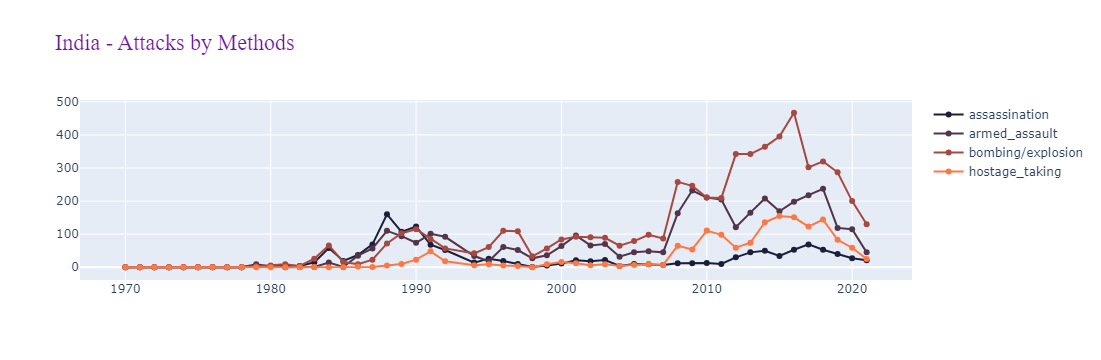

In [33]:
# format columns
df.columns = format_cols(df.columns.to_list())

# further format columns
new_cols = ['entity', 'code', 'year']
for c in df.columns[-9:].tolist():
    nc = c.split('terrorist_attacks_')[1]
    new_cols.append(nc)

df.columns = new_cols

# filter & reset index
df = df[df['entity'] == my_country]
df.reset_index(drop=True, inplace=True)

# combine 2 "hostage taking" columns into a single
df['hostage_taking'] = np.add(df['hostage_taking_(barricade_incident)'], df['hostage_taking_(kidnapping)'])
df.drop(['hostage_taking_(barricade_incident)','hostage_taking_(kidnapping)'],axis=1, inplace=True)


# visualize
fig2 = go.Figure()

# list of columns to plot
cols = df.columns[-4:].to_list()

# attacks, fatalies & injuries
for i, c in enumerate(cols,start=1):
    fig2.add_trace(go.Scatter(x=df['year'], y=df[c],
                    mode='lines+markers',
                    name=c,
                    hovertemplate="<br>".join(["year: %{x}",
                                               "count: %{y}",
                                               "<extra></extra>"
                                              ]),
                    line=dict(color=palette[i], width=2) ))



fig2.update_layout(title='India - Attacks by Methods',
                  title_font=title_font_config,
                  hovermode='x unified'
                 )
fig2.show()

In [45]:
#2000 - 2020: A two decades observations

#bombing/explosion was the most widely used method of attack while assasination was the least
#The second least method of attack was hostage taking
#Armed assault attacks rose dramatically

In [ ]:
#Share of Deaths from Terrorism

In [36]:
#data share-of-deaths-from-terrorism.csv
csv = filepaths[11]
df = pd.read_csv(csv)
df

,Entity,Code,Year,Share of deaths from terrorism
0,Afghanistan,AFG,1970,0.000000
1,Afghanistan,AFG,1971,0.000000
2,Afghanistan,AFG,1972,0.000000
3,Afghanistan,AFG,1973,0.000000
4,Afghanistan,AFG,1974,0.000000
...,...,...,...,...
9272,Zimbabwe,ZWE,2017,0.000000
9273,Zimbabwe,ZWE,2018,0.001663
9274,Zimbabwe,ZWE,2019,0.000000
9275,Zimbabwe,ZWE,2020,0.000784


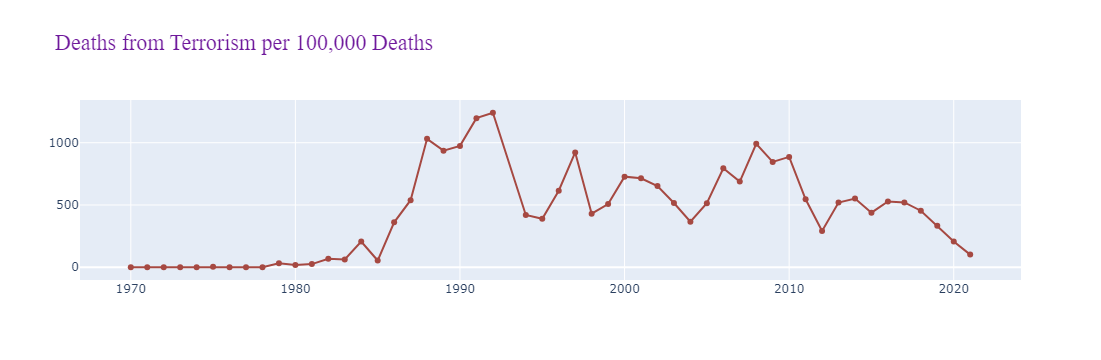

In [37]:
# format columns
df.columns = format_cols(df.columns.to_list())

# filter & reset index
df = df[df['entity'] == my_country]
df.reset_index(drop=True, inplace=True)

# add new column -- deaths from terrorism per 100,000 deaths
df['death_100k'] = df['share_of_deaths_from_terrorism'].apply(lambda x: (x * 100000))

# visualize
fig3 = go.Figure()

# attacks, fatalies & injuries
fig3.add_trace(go.Scatter(x=df['year'], y=df['death_100k'],
                    mode='lines+markers',
                    name='death_100k',
                    hovertemplate="<br>".join(["year: %{x}",
                                               "count: %{y}",
                                               "<extra></extra>"
                                              ]),
                    line=dict(color=palette[3], width=2) ))

fig3.update_layout(title='Deaths from Terrorism per 100,000 Deaths',
                  title_font=title_font_config,
                  hovermode='x unified'
                 )
fig3.show()

In [ ]:
#2000 - 2020: A two decades observations

#Less deaths from terrorism (per 100,000) compared to the previous 2 decades
#Highest was in 2008 (~991 per 100,000)
#Lowest was in 2020 & beyond (~102 - 207 per 100,000)